# Running a multilevel sweep parameter study with PhysiCOOL

Now, we will see if we can identify the parameters that generated these results by running a multilevel parameter sweep. We will start at a random point (speed=3.0, bias=0.6) and explore the parameter space. We can choose the number of points per direction that will be explored (points_dir) and the percentage of change per direction in regards to the initial value (percentage_dir). We can also select the number of levels to go through (n_levels).

In [6]:
import numpy as np

from physicool import optimization as opt
from physicool.updaters import CellUpdater, update_motility_values
from physicool.processing import get_final_y_position

# Compiles the project and creates a black box object for it
# opt.compile_project()    
black_box = opt.PhysiCellBlackBox()

# Define the updater we want to use (change motility data)
updater = CellUpdater(updater_function=update_motility_values,
                     config_path="config/PhysiCell_settings.xml", cell_definition_name="default")

# Assign the updater and processor to the black box
black_box.updater = updater
black_box.processor = get_final_y_position

# Run the model with the target values (speed=2.0 bias=0.9)
opt.clean_tmp_files()

In [ ]:
target_data = np.loadtxt("do_not_peek.csv", delimiter=',', dtype=object)

(2.4395333333333333, 0.4948407407407407)

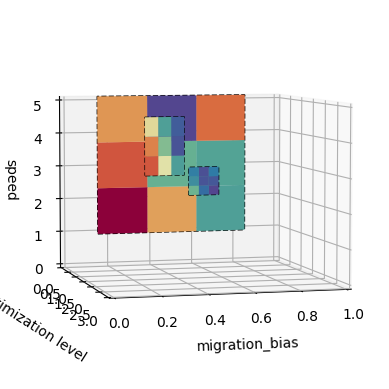

In [13]:
%matplotlib inline
from physicool import optimization as opt

# Create the multilevel sweep
sweeper = opt.MultiLevelSweep(black_box=black_box, 
                              target_data=target_data, 
                              n_levels=3,
                              points_dir=4, 
                              percentage_dir=0.7, 
                              parameters=["speed", "migration_bias"])

# Be sure that we don't select values that don't make sense to PhysiCell
sweeper.param_bounds = [(0.0, None), (0.0, 1.0)]

# Run the multilevel sweep
sweeper.run_sweep(initial_point=(3, 0.7))